#### Problem statement-Prediction of insurance claim and fraud 

In [13]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
data=pd.read_csv("ML_Project .csv")
data.head() 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Step-1 Basic Data Check

In [15]:
df=data.copy()

In [4]:
df.shape # rows=381109 , column=12

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [25]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [28]:
for col in df.columns:
    print(f"{col}  -->{df[col].nunique()} unique values")


id  -->381109 unique values
Gender  -->2 unique values
Age  -->66 unique values
Driving_License  -->2 unique values
Region_Code  -->53 unique values
Previously_Insured  -->2 unique values
Vehicle_Age  -->3 unique values
Vehicle_Damage  -->2 unique values
Annual_Premium  -->48838 unique values
Policy_Sales_Channel  -->155 unique values
Vintage  -->290 unique values
Response  -->2 unique values


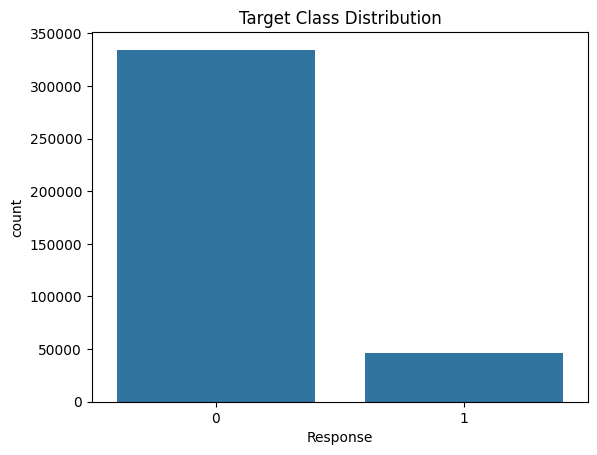

In [19]:
sns.countplot(x='Response', data=df)
plt.title("Target Class Distribution")
plt.show()

In [16]:
df.drop(columns=['id'], inplace=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Encode Categorical Features

In [18]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])  # Yes=1, No=0

# One-hot encode Vehicle_Age (optional)
df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=True)


In [19]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,False,True
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,False,False
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,False,True
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,True,False
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,True,False


#### EDA (Exploratory Data Analysis)

<Axes: title={'center': 'Class Distribution'}, xlabel='Response'>

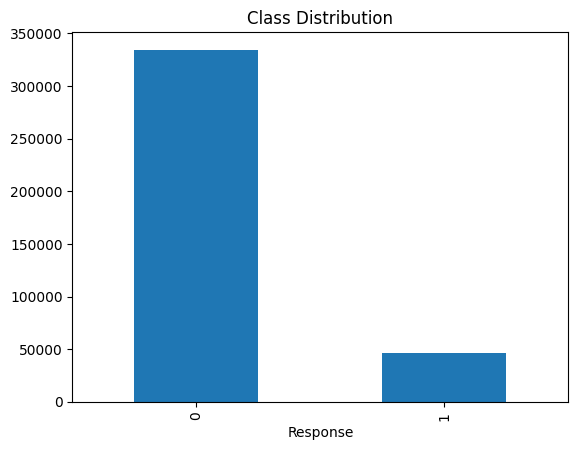

In [20]:
df['Response'].value_counts().plot(kind='bar', title='Class Distribution')


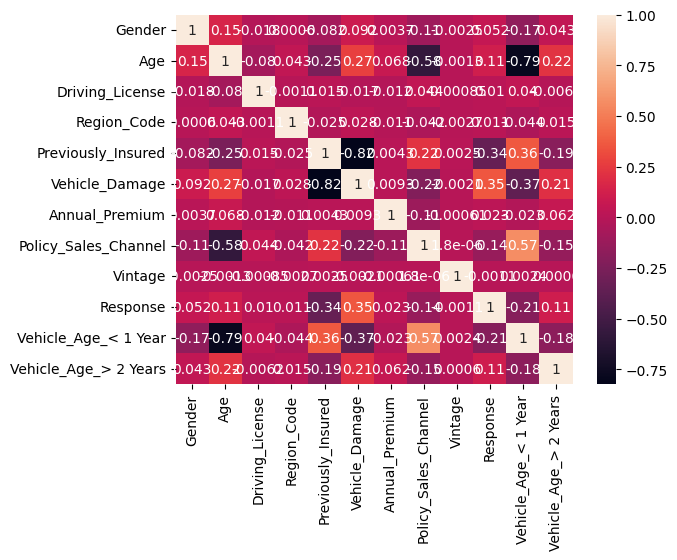

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()


#### Split Data

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train a Basic Logistic Regression Model (Baseline)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation report
print("Logistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred))


Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.09      0.00      0.00      9523

    accuracy                           0.87     76222
   macro avg       0.48      0.50      0.47     76222
weighted avg       0.78      0.87      0.82     76222



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Evaluation:\n")
print(classification_report(y_test, y_pred_tree))


Decision Tree Evaluation:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66699
           1       0.30      0.30      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



#### AdaBoost

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_ab)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[66699     0]
 [ 9523     0]]


In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ab_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)

print("AdaBoost Evaluation:\n")
print(classification_report(y_test, y_pred_ab))


AdaBoost Evaluation:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

#### Check ROC-AUC Score (Advanced Metric)

In [32]:
from sklearn.metrics import roc_auc_score

# For AdaBoost
y_probs_ab = ab_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs_ab)

print("AdaBoost ROC-AUC Score:", roc_auc)


AdaBoost ROC-AUC Score: 0.7901590864522274


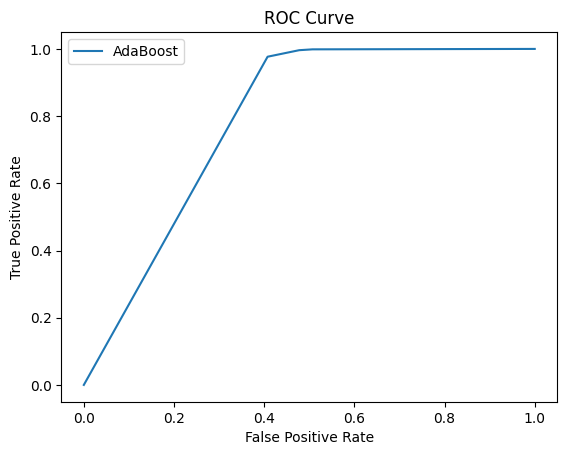

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs_ab)
plt.plot(fpr, tpr, label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ab_model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-validated ROC-AUC scores: [0.78906045 0.78921374 0.78867597 0.78975923 0.79001724]
Mean AUC: 0.7893453253189964


#### Visualize Feature Importance (For Presentation)

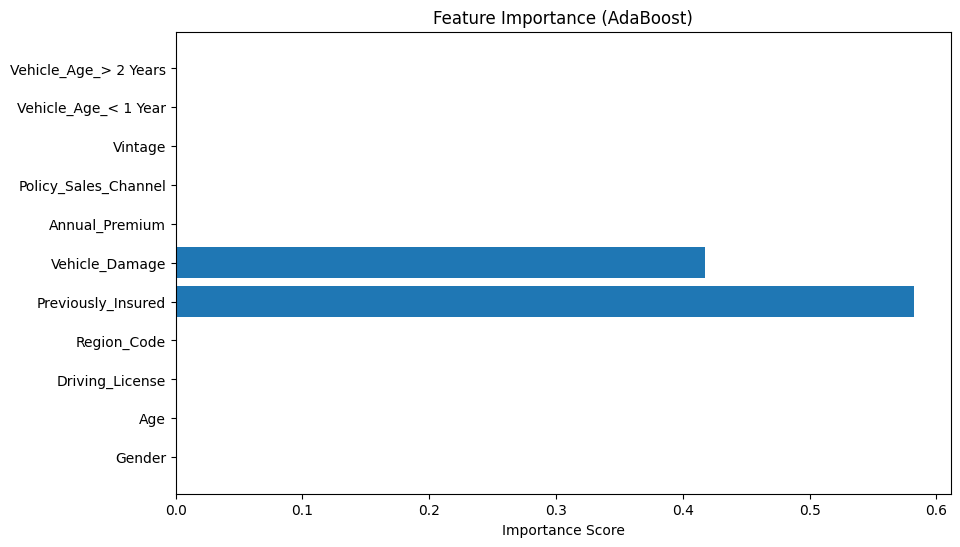

In [28]:
import matplotlib.pyplot as plt

importances = ab_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance (AdaBoost)")
plt.show()


In [35]:
import joblib

# Save the trained AdaBoost model
joblib.dump(ab_model, 'best_model.pkl')
print("Model saved as best_model.pkl")


Model saved as best_model.pkl
